In [1]:
#!pip install ggplot
import pandas as pd
from sklearn.cluster import MiniBatchKMeans, KMeans
import ggplot as gg
from ggplot import *
import os
from pathlib import Path
from pandas.plotting import scatter_matrix
import time
from scipy.spatial.distance import cdist


%pylab inline

/Users/nolanthomas/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/nolanthomas/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/nolanthomas/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


/Users/nolanthomas/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ylim', 'colors', 'legend', 'xlim']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
home = str(Path.home())
file_name = 'out_model_features.20180523.tab.csv'
model_features = os.path.join(home, 'data', file_name)

df_features_orig = pd.read_csv(model_features, delimiter='\t')
df_features = df_features_orig

#df_features = df_features[['reviewerID','asin','brand','level4_name','price','person_l4_budget','average_rating']]
#df_features.head()
price_min,price_max = min(df_features['price']),max(df_features['price'])
person_l4_budget_min,person_l4_budget_max = min(df_features['person_l4_budget']),max(df_features['person_l4_budget'])
average_rating_min,average_rating_max = min(df_features['average_rating']),max(df_features['average_rating'])

print (price_min, price_max)
print (person_l4_budget_min, person_l4_budget_max)
print (average_rating_min, average_rating_max)

df_features['price_scaled'] = (df_features['price'] - price_min)/(price_max - price_min)
df_features['person_l4_budget_scaled'] = (df_features['person_l4_budget'] - person_l4_budget_min)/(person_l4_budget_max - person_l4_budget_min)
df_features['average_rating_scaled'] = (df_features['average_rating'] - average_rating_min)/(average_rating_max - average_rating_min)

#df_features.columns
df_features = df_features[['reviewerID','asin','brand','level4_name','price','price_scaled',
                           'person_l4_budget', 'person_l4_budget_scaled', 'average_rating','average_rating_scaled']]
df_features['brand'].fillna('Unknown', inplace=True)
df_features.head()

2.49 279.99
-184.48 251.8
1.5 5.0


/Users/nolanthomas/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,reviewerID,asin,brand,level4_name,price,price_scaled,person_l4_budget,person_l4_budget_scaled,average_rating,average_rating_scaled
0,A177HBDI4GZUND,B000W2F1EQ,California Costumes,Costumes,19.59,0.061622,-1.84,0.41863,4.666667,0.904762
1,A1FD7D9BMQNMNG,B000W2F1EQ,California Costumes,Costumes,19.59,0.061622,-1.84,0.41863,4.666667,0.904762
2,A1QJUQ1IIYJP9S,B000W2F1EQ,California Costumes,Costumes,19.59,0.061622,-1.84,0.41863,4.666667,0.904762
3,A1SD6G5GRPG2S6,B000W2F1EQ,California Costumes,Costumes,19.59,0.061622,-1.84,0.41863,4.666667,0.904762
4,A24G0PG98KVHMH,B000W2F1EQ,California Costumes,Costumes,19.59,0.061622,-1.84,0.41863,4.666667,0.904762


In [215]:
df_scatter = df_features[['price_scaled','person_l4_budget_scaled','average_rating_scaled']]
df_scatter.head()

,price_scaled,person_l4_budget_scaled,average_rating_scaled
0,0.061622,0.41863,0.904762
1,0.061622,0.41863,0.904762
2,0.061622,0.41863,0.904762
3,0.061622,0.41863,0.904762
4,0.061622,0.41863,0.904762


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c12c565f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c0d15b828>]], dtype=object)

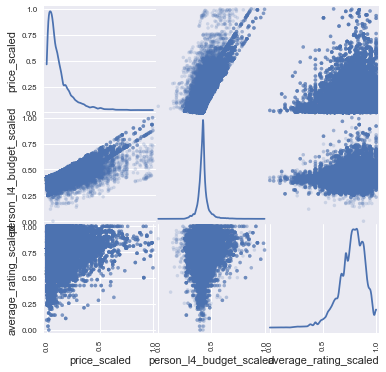

In [137]:
scatter_matrix(
    df_scatter, 
    alpha=0.2, figsize=(6, 6), diagonal='kde')

In [3]:
model_df = pd.concat([df_features[['price_scaled','person_l4_budget_scaled','average_rating_scaled']],
                     #pd.get_dummies(df_features[['level4_name']], prefix=['l4'])],
                     pd.get_dummies(df_features[['brand','level4_name']], prefix=['brand', 'l4'])],
                     axis=1)

In [4]:
model_df.columns

Index(['price_scaled', 'person_l4_budget_scaled', 'average_rating_scaled',
       'brand_/', 'brand_007Lingerie', 'brand_1000 Jewels', 'brand_100Silver',
       'brand_143Fashion', 'brand_180s', 'brand_1826 Jeans',
       ...
       'l4_Top-Handle Bags', 'l4_Tops & Tees', 'l4_Unkown',
       'l4_Wallets, Card Cases & Money Organizers', 'l4_Watch Bands',
       'l4_Wedding & Engagement', 'l4_Wigs', 'l4_Women', 'l4_Wrist Watches',
       'l4_Wristlets'],
      dtype='object', length=1842)

In [218]:
model_df.head()

,price_scaled,person_l4_budget_scaled,average_rating_scaled,l4_Active,l4_Athletic,l4_Belts,l4_Blazers & Jackets,l4_Boots,l4_Clothing,l4_Clothing Sets,...,l4_Top-Handle Bags,l4_Tops & Tees,l4_Unkown,"l4_Wallets, Card Cases & Money Organizers",l4_Watch Bands,l4_Wedding & Engagement,l4_Wigs,l4_Women,l4_Wrist Watches,l4_Wristlets
0,0.061622,0.41863,0.904762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.061622,0.41863,0.904762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.061622,0.41863,0.904762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.061622,0.41863,0.904762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.061622,0.41863,0.904762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
K = range(1,50)
distortions=[]
for k in K:
    #print(k)
    #kmeanModel = KMeans(n_clusters=k).fit(model_df)   
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=k, batch_size=200,
                      n_init=10, max_no_improvement=10, verbose=0)
    t0 = time.time()
    mbk.fit(model_df)
    t_mini_batch = time.time() - t0
    print (k, t_mini_batch)
    distortions.append(sum(np.min(cdist(model_df, mbk.cluster_centers_, 'euclidean'), axis=1)) / model_df.shape[0])

1 0.2835421562194824
2 0.3486628532409668
3 0.3276968002319336
4 0.47608399391174316
5 0.5985441207885742
6 0.5386266708374023
7 0.6717898845672607
8 0.609745979309082
9 0.8587050437927246
10 0.9749972820281982
11 0.5638670921325684
12 0.5023119449615479
13 0.8890647888183594
14 0.7935609817504883
15 0.8283829689025879
16 1.0907261371612549
17 0.8026587963104248
18 0.617891788482666
19 1.0177521705627441
20 0.8752152919769287
21 1.037696123123169
22 0.8239800930023193
23 1.3648042678833008
24 1.1299610137939453
25 1.7537901401519775
26 0.9885332584381104
27 1.040708065032959
28 0.42508697509765625
29 0.7679550647735596
30 0.841181755065918
31 1.097912073135376
32 1.0210299491882324
33 1.238886833190918
34 0.3910527229309082
35 0.423015832901001
36 1.6495680809020996
37 1.1484050750732422
38 1.5481150150299072
39 0.41361498832702637
40 0.7811698913574219
41 0.43770527839660645
42 1.2246391773223877
43 0.9616661071777344
44 0.4850728511810303
45 0.4666430950164795
46 0.5609538555145264
4

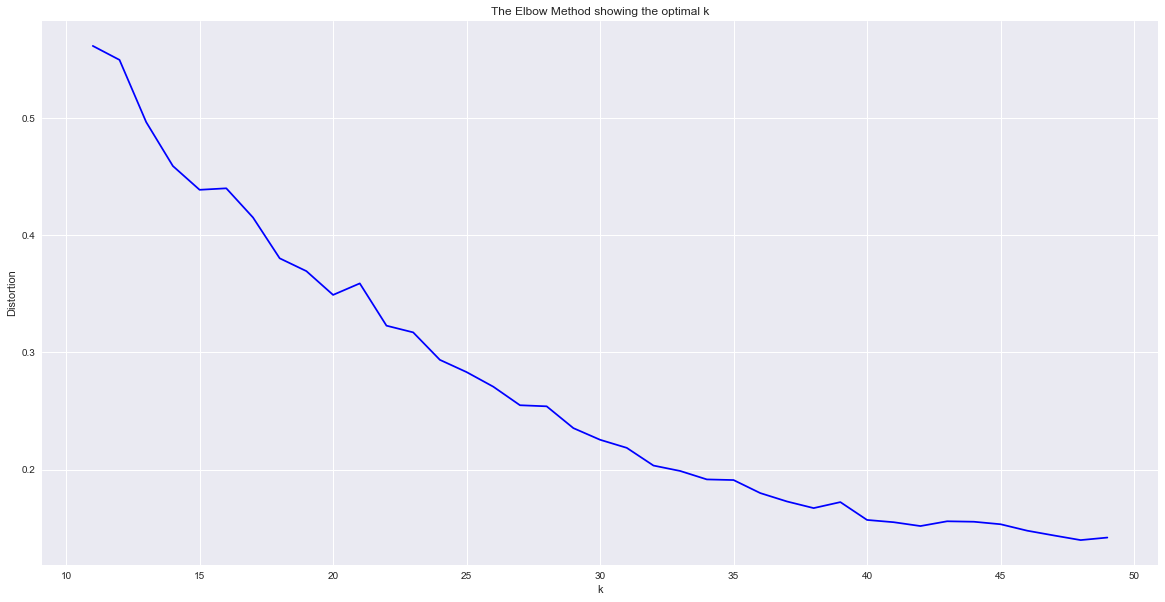

In [181]:
# Plot the elbow
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn')

plt.figure(figsize=(20,10))
plt.plot(K[10:], distortions[10:], 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [5]:
mbk = MiniBatchKMeans(init='k-means++', n_clusters=40, batch_size=50,
                      n_init=10, max_no_improvement=10, verbose=0)
t0 = time.time()
mbk.fit(model_df)
t_mini_batch = time.time() - t0
print (t_mini_batch)
model_df['cluster'] = mbk.fit_predict(model_df)
#model_df.head()

16.593847036361694


In [6]:
model_df.head()

,price_scaled,person_l4_budget_scaled,average_rating_scaled,brand_/,brand_007Lingerie,brand_1000 Jewels,brand_100Silver,brand_143Fashion,brand_180s,brand_1826 Jeans,...,l4_Tops & Tees,l4_Unkown,"l4_Wallets, Card Cases & Money Organizers",l4_Watch Bands,l4_Wedding & Engagement,l4_Wigs,l4_Women,l4_Wrist Watches,l4_Wristlets,cluster
0,0.061622,0.41863,0.904762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
1,0.061622,0.41863,0.904762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
2,0.061622,0.41863,0.904762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
3,0.061622,0.41863,0.904762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
4,0.061622,0.41863,0.904762,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
model_df['x'] = pca.fit_transform(model_df)[:,0]
model_df['y'] = pca.fit_transform(model_df)[:,1]
model_df = model_df.reset_index()

In [8]:
model_df.columns

Index(['index', 'price_scaled', 'person_l4_budget_scaled',
       'average_rating_scaled', 'brand_/', 'brand_007Lingerie',
       'brand_1000 Jewels', 'brand_100Silver', 'brand_143Fashion',
       'brand_180s',
       ...
       'l4_Wallets, Card Cases & Money Organizers', 'l4_Watch Bands',
       'l4_Wedding & Engagement', 'l4_Wigs', 'l4_Women', 'l4_Wrist Watches',
       'l4_Wristlets', 'cluster', 'x', 'y'],
      dtype='object', length=1846)

In [9]:
model_df.head(2)

,index,price_scaled,person_l4_budget_scaled,average_rating_scaled,brand_/,brand_007Lingerie,brand_1000 Jewels,brand_100Silver,brand_143Fashion,brand_180s,...,"l4_Wallets, Card Cases & Money Organizers",l4_Watch Bands,l4_Wedding & Engagement,l4_Wigs,l4_Women,l4_Wrist Watches,l4_Wristlets,cluster,x,y
0,0,0.061622,0.41863,0.904762,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,4.571732,-0.086584
1,1,0.061622,0.41863,0.904762,0,0,0,0,0,0,...,0,0,0,0,0,0,0,21,4.571732,-0.086584


In [10]:
df_features.head()

,reviewerID,asin,brand,level4_name,price,price_scaled,person_l4_budget,person_l4_budget_scaled,average_rating,average_rating_scaled
0,A177HBDI4GZUND,B000W2F1EQ,California Costumes,Costumes,19.59,0.061622,-1.84,0.41863,4.666667,0.904762
1,A1FD7D9BMQNMNG,B000W2F1EQ,California Costumes,Costumes,19.59,0.061622,-1.84,0.41863,4.666667,0.904762
2,A1QJUQ1IIYJP9S,B000W2F1EQ,California Costumes,Costumes,19.59,0.061622,-1.84,0.41863,4.666667,0.904762
3,A1SD6G5GRPG2S6,B000W2F1EQ,California Costumes,Costumes,19.59,0.061622,-1.84,0.41863,4.666667,0.904762
4,A24G0PG98KVHMH,B000W2F1EQ,California Costumes,Costumes,19.59,0.061622,-1.84,0.41863,4.666667,0.904762


In [11]:
clustered_df = pd.concat([df_features[['reviewerID', 'asin', 'brand', 'level4_name', 'price', 'person_l4_budget',
                                     'average_rating']], model_df[['cluster', 'x', 'y']]], axis=1)

In [12]:
print (len(clustered_df['x']))
print (len(clustered_df['y']))
print (clustered_df.shape)

131979
131979
(131979, 10)


In [13]:
sort(clustered_df['cluster'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

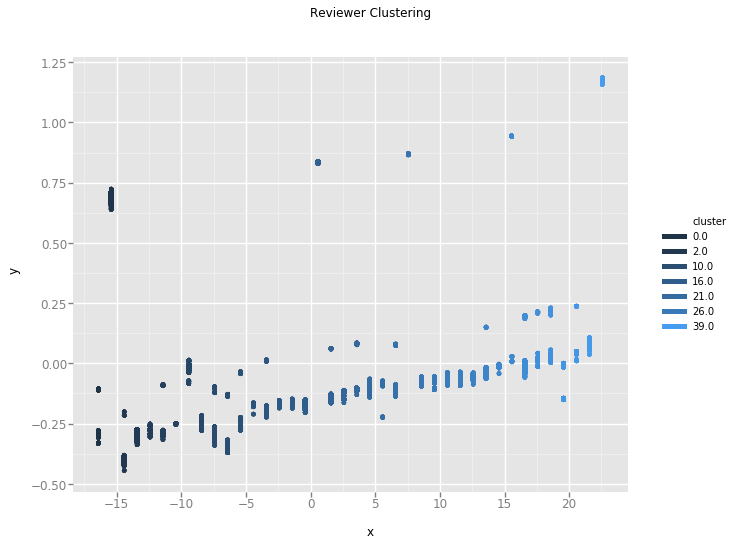

<ggplot: (7534102613)>

In [14]:
mpl.rcParams["figure.figsize"] = "15, 15"


gg.ggplot(clustered_df, aes(x='x', y='y', color='cluster')) + \
    geom_point(size=20) + \
    ggtitle("Reviewer Clustering")

In [16]:
asin_df = clustered_df[['asin','cluster']]

In [17]:
asin_df.drop_duplicates(inplace=True)


/Users/nolanthomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
out_clustered_df =  pd.merge(df_features_orig[['reviewerID','asin','unixReviewTime','brand','price','feature_vector',
                                               'top_categories','level4','level4_name','average_rating','polarity',
                                               'sentiment','season','price_delta_l4avg','level4_average',
                                               'person_l4_budget']],asin_df,
                             how='inner', 
                             on='asin')
out_clustered_df

,reviewerID,asin,unixReviewTime,brand,price,feature_vector,top_categories,level4,level4_name,average_rating,polarity,sentiment,season,price_delta_l4avg,level4_average,person_l4_budget,cluster
0,A177HBDI4GZUND,B000W2F1EQ,1394582400,California Costumes,19.59,NaN,'000000000000000000000000000000000000000000000...,'000000000100000000000000000000000000000000000...,Costumes,4.666667,0.242822,'00010','1000',-1.84,21.43,-1.84,21
1,A1FD7D9BMQNMNG,B000W2F1EQ,1403222400,California Costumes,19.59,NaN,'000000000000000000000000000000000000000000000...,'000000000100000000000000000000000000000000000...,Costumes,4.666667,0.242822,'00010','0100',-1.84,21.43,-1.84,21
2,A1QJUQ1IIYJP9S,B000W2F1EQ,1355356800,California Costumes,19.59,NaN,'000000000000000000000000000000000000000000000...,'000000000100000000000000000000000000000000000...,Costumes,4.666667,0.242822,'00010','0001',-1.84,21.43,-1.84,21
3,A1SD6G5GRPG2S6,B000W2F1EQ,1401926400,California Costumes,19.59,NaN,'000000000000000000000000000000000000000000000...,'000000000100000000000000000000000000000000000...,Costumes,4.666667,0.242822,'00010','0100',-1.84,21.43,-1.84,21
4,A24G0PG98KVHMH,B000W2F1EQ,1352073600,California Costumes,19.59,NaN,'000000000000000000000000000000000000000000000...,'000000000100000000000000000000000000000000000...,Costumes,4.666667,0.242822,'00010','0010',-1.84,21.43,-1.84,21
5,A2IG50DBONME5V,B000W2F1EQ,1381536000,California Costumes,19.59,NaN,'000000000000000000000000000000000000000000000...,'000000000100000000000000000000000000000000000...,Costumes,4.666667,0.242822,'00010','0010',-1.84,21.43,-1.84,21
6,A2KB8LQPT7AH4O,B000W2F1EQ,1383004800,California Costumes,19.59,NaN,'000000000000000000000000000000000000000000000...,'000000000100000000000000000000000000000000000...,Costumes,4.666667,0.242822,'00010','0010',-1.84,21.43,-1.84,21
7,A2NKCH9IKYW77J,B000W2F1EQ,1394409600,California Costumes,19.59,NaN,'000000000000000000000000000000000000000000000...,'000000000100000000000000000000000000000000000...,Costumes,4.666667,0.242822,'00010','1000',-1.84,21.43,-7.86,21
8,A30C31Q84V3EWZ,B000W2F1EQ,1381449600,California Costumes,19.59,NaN,'000000000000000000000000000000000000000000000...,'000000000100000000000000000000000000000000000...,Costumes,4.666667,0.242822,'00010','0010',-1.84,21.43,-1.84,21
9,A33SU1G1PW4Z2W,B000W2F1EQ,1385424000,California Costumes,19.59,NaN,'000000000000000000000000000000000000000000000...,'000000000100000000000000000000000000000000000...,Costumes,4.666667,0.242822,'00010','0010',-1.84,21.43,-1.84,21


In [251]:
out_clustered_df.to_csv(os.path.join(home, 'data','clustered.' + file_name), sep='\t', index=False)

In [19]:
out_clustered_df[['reviewerID','asin',
                  'unixReviewTime','brand','price','feature_vector',
                  'top_categories','level4','level4_name','average_rating','polarity',
                  'sentiment','season','price_delta_l4avg','level4_average',
                  'person_l4_budget']].to_csv(os.path.join(home, 'data','what.clustered.' + file_name), sep='\t', index=False)